<a href="https://colab.research.google.com/github/mrefugionv/S8---ZUBER/blob/main/S8_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estudiarás una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

Descripción de los datos
Una base de datos con información sobre viajes en taxi en Chicago:

tabla neighborhoods: datos sobre los barrios de la ciudad
* name: nombre del barrio
* neighborhood_id: código del barrio

tabla cabs: datos sobre los taxis
* cab_id: código del vehículo
* vehicle_id: ID técnico del vehículo
* company_name: la empresa propietaria del vehículo

tabla trips: datos sobre los viajes
* trip_id: código del viaje
* cab_id: código del vehículo que opera el viaje
* start_ts: fecha y hora del inicio del viaje (tiempo redondeado a la hora)
* end_ts: fecha y hora de finalización del viaje (tiempo redondeado a la hora)
* duration_seconds: duración del viaje en segundos
* distance_miles: distancia del viaje en millas
* pickup_location_id: código del barrio de recogida
* dropoff_location_id: código del barrio de finalización


tabla weather_records: datos sobre el clima
* record_id: código del registro meteorológico
* ts: fecha y hora del registro (tiempo redondeado a la hora)
* temperature: temperatura cuando se tomó el registro
* description: breve descripción de las condiciones meteorológicas, por ejemplo, "lluvia ligera" o "nubes dispersas"

Esquema de la tabla
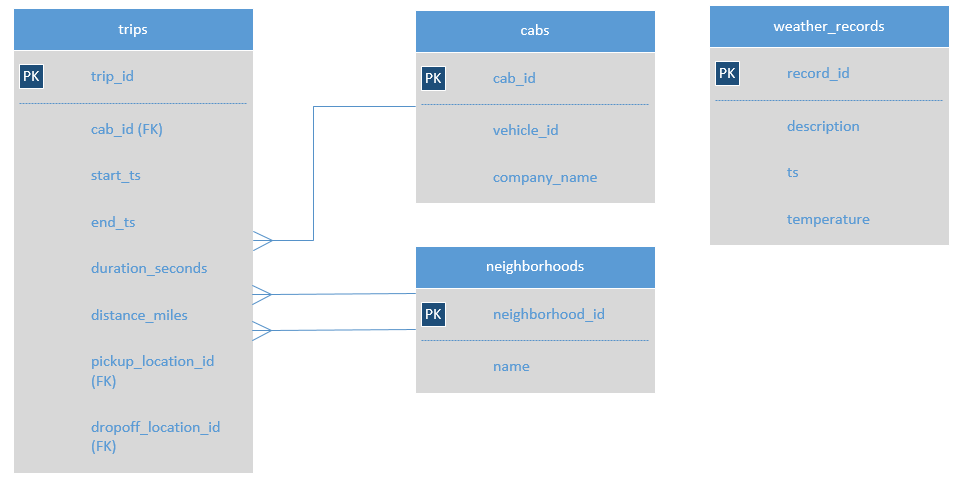

Nota: no existe una conexión directa entre las tablas trips y weather_records en la base de datos. Pero aún puedes usar JOIN y vincularlos usando la hora en la que comenzó el viaje (trips.start_ts) y la hora en la que se tomó el registro meteorológico (weather_records.ts).

In [1]:
# Importar el comando mágico
%load_ext sql

1.

Imprime el campo company_name. Encuentra la cantidad de viajes en taxi para cada compañía de taxis para el 15 y 16 de noviembre de 2017, asigna al campo resultante el nombre trips_amount e imprímelo también. Ordena los resultados por el campo trips_amount en orden descendente.

In [ ]:
%%sql

SELECT
    cabs.company_name AS company_name,
    COUNT(trips.trip_id) AS trips_amount
FROM trips
    LEFT JOIN cabs ON trips.cab_id = cabs.cab_id
WHERE CAST(trips.start_ts AS date) IN ('2017-11-15','2017-11-16')
GROUP BY company_name
ORDER BY trips_amount DESC;

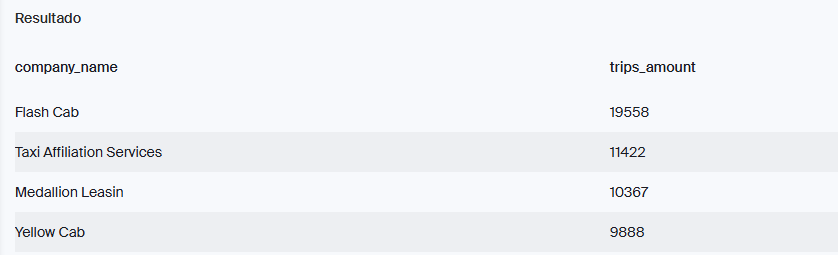

2.

Encuentra la cantidad de viajes para cada empresa de taxis cuyo nombre contenga las palabras "Yellow" o "Blue" del 1 al 7 de noviembre de 2017. Nombra la variable resultante trips_amount. Agrupa los resultados por el campo company_name.

In [ ]:
%%sql
SELECT
    cabs.company_name AS company_name,
    COUNT(trips.trip_id) AS trips_amount
FROM trips
    LEFT JOIN cabs ON trips.cab_id = cabs.cab_id
WHERE
    (CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-7' )
    AND (cabs.company_name LIKE '%Yellow%' OR cabs.company_name LIKE '%Blue%')
GROUP BY company_name
ORDER BY trips_amount DESC;

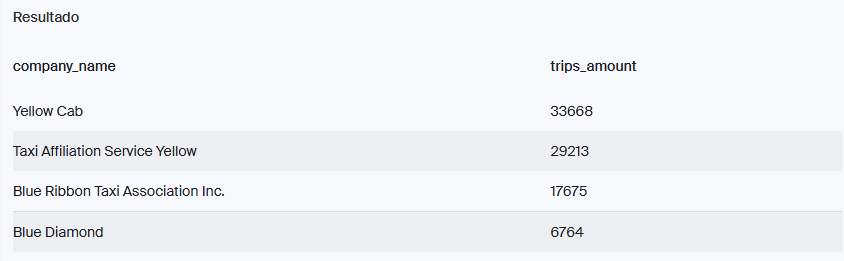


3. Del 1 al 7 de noviembre de 2017, las empresas de taxis más populares fueron Flash Cab y Taxi Affiliation Services. Encuentra el número de viajes de estas dos empresas y asigna a la variable resultante el nombre trips_amount. Junta los viajes de todas las demás empresas en el grupo "Other". Agrupa los datos por nombres de empresas de taxis. Asigna el nombre company al campo con nombres de empresas de taxis. Ordena el resultado en orden descendente por trips_amount.

In [ ]:
%%sql
SELECT
    CASE
    WHEN cabs.company_name = 'Flash Cab' THEN cabs.company_name
    WHEN cabs.company_name = 'Taxi Affiliation Services'
    THEN cabs.company_name
    ELSE 'Other'
    END AS company,
    COUNT(trips.trip_id) AS trips_amount

FROM trips
    INNER JOIN cabs ON trips.cab_id = cabs.cab_id
WHERE
    CAST(trips.start_ts AS date) BETWEEN '2017-11-01' AND '2017-11-07'
GROUP BY company
ORDER BY trips_amount DESC;

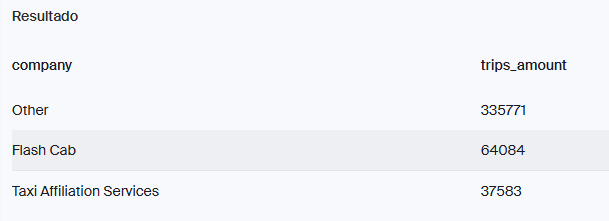

4.

Recupera los identificadores de los barrios de O'Hare y Loop de la tabla neighborhoods.

In [ ]:
%%sql
SELECT
    name AS name,
    neighborhood_id
FROM neighborhoods
WHERE name LIKE 'O%Hare'
    OR name ='Loop'

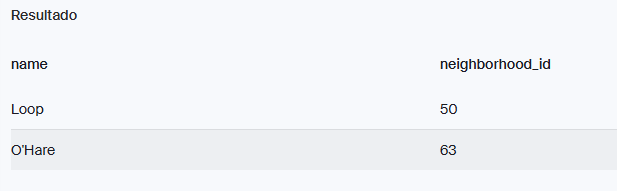

5.

Para cada hora recupera los registros de condiciones meteorológicas de la tabla weather_records. Usando el operador CASE, divide todas las horas en dos grupos: Bad si el campo description contiene las palabras rain o storm, y Good para los demás. Nombra el campo resultante weather_conditions. La tabla final debe incluir dos campos: fecha y hora (ts) y weather_conditions.



In [ ]:
%%sql
SELECT
    CAST(ts AS timestamp) AS ts,
    CASE
    WHEN description LIKE '%rain%' THEN 'Bad'
    WHEN description LIKE '%storm%' THEN 'Bad'
    ELSE 'Good'
    END AS weather_conditions
FROM weather_records


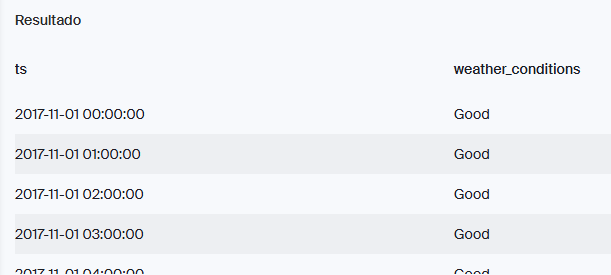

6.

Recupera de la tabla de trips todos los viajes que comenzaron en el Loop (pickup_location_id: 50) el sábado y terminaron en O'Hare (dropoff_location_id: 63). Obtén las condiciones climáticas para cada viaje. Utiliza el método que aplicaste en la tarea anterior. Recupera también la duración de cada viaje. Ignora los viajes para los que no hay datos disponibles sobre las condiciones climáticas.

Las columnas de la tabla deben estar en el siguiente orden:

start_ts
weather_conditions
duration_seconds
Ordena por trip_id.

In [ ]:
%%sql

SELECT
    trips.start_ts,
    SUBQ.weather_conditions,
    trips.duration_seconds
FROM
    ( SELECT CAST(ts AS timestamp) AS ts,
    CASE
    WHEN description LIKE '%rain%' THEN 'Bad'
    WHEN description LIKE '%storm%' THEN 'Bad'
    ELSE 'Good'
    END AS weather_conditions
    FROM weather_records
    ) AS SUBQ
INNER JOIN trips ON CAST(SUBQ.ts AS timestamp) = CAST (trips.start_ts AS timestamp)
WHERE trips.pickup_location_id = 50
    AND trips.dropoff_location_id = 63
    AND EXTRACT (DOW from trips.start_ts) = 6
ORDER BY trip_id

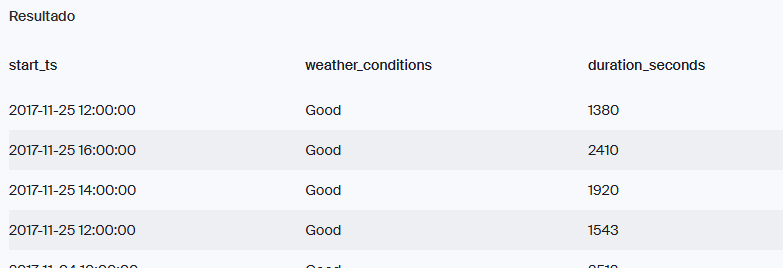